In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import lyricsgenius as lg

In [4]:
client = '3EoU324TLPMo1v1t0fuNtAfrqlnZVfRd8_AQbsMLvUnNXRvyqSqg1iesGaCA-Dtc'
secret = '_bUyrzGuG_hqnt_MNKKsoQWdVgooMoc3riCqh5QX_KuzV-OfAq6XoGQQ5kcGGA0fxobTifVlD0Hm-Lm4gZu2KQ'
access = 'aMNdATGZum7Ls9DVe15GT0vsaKZUOaYHjXB-4Ix2ZRdeR2nBWWwOX_AuljHZ-Nk2'

In [5]:
tracks = pd.read_csv("data/data.csv")
genres = pd.read_csv('data/data_w_genres.csv')
top10 = pd.read_csv('data/top10s.csv', encoding = 'ISO-8859-1')
lyrics = pd.read_csv('data/spotifywlyrics.csv')

In [6]:
english_lyrics = lyrics.loc[lyrics['language'] == 'en']

In [7]:
english_lyrics.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en
5,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",70,3GNzXsFbzdwM0WKCZtgeNP,Chapters,2019-04-26,urban contemporary,4WiB26kw0INKwbzfb5M6Tv,...,-6.157,1,0.0550,0.28000,0.00000,0.0975,0.305,147.764,224720,en


In [8]:
english_lyrics.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [9]:
from textblob import TextBlob

In [11]:
# lyrics_list = english_lyrics.lyrics.to_list()
# subj = []
# pol = []
# for lyric in lyrics_list:
#     song = TextBlob(lyric)
#     subj.append(song.sentiment.subjectivity)
#     pol.append(song.sentiment.polarity)

In [12]:
# english_lyrics['lyrical_subjectivity'] = subj
# english_lyrics['lyrical_polarity'] = pol

In [13]:
# track_name_list = english_lyrics.track_name.to_list()
# subjTrack = []
# polTrack = []
# for trackname in track_name_list:
#     name = TextBlob(trackname)
#     subjTrack.append(name.sentiment.subjectivity)
#     polTrack.append(name.sentiment.polarity)

In [14]:
# english_lyrics['track_name_subjectivity'] = subjTrack
# english_lyrics['track_name_polarity'] = polTrack

In [15]:
# english_lyrics.to_csv("data/tracks_w_nlp_en.csv")

In [22]:
to_senti = pd.read_csv("data/all_features_dataset.csv", index_col = 0)

In [23]:
len(to_senti)

7679

In [25]:
lyrics = to_senti['lyrics'].to_list()

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kunal/nltk_data...


True

In [32]:
lyrics[0]

'NA Yeah, Spyderman and Freeze in full effect Uh-huh You ready, Ron? I\'m ready You ready, Biv? I\'m ready, Slick, are you? Oh, yeah, break it down NA Girl, I, must (warn you) I sense something strange in my mind Situation is (serious) Let\'s cure it cause we\'re running out of time It\'s oh, so (beautiful) Relationships they seem from the start It\'s all so (deadly) When love is not together from the heart It\'s drivin\' me out of my mind! That\'s why it\'s HARD for me to find Can\'t get it out of my head! Miss her, kiss her, love her(Wrong move you\'re dead!) That girl is (poison)...Never trust a big butt and smile That girl is (poison)..("POISON!!") NA (-caution) Before I start to meet a fly girl, you know? Cause in some (portions) You\'ll think she\'s the best thing in the world She\'s so - (fly) She\'ll drive you right out of your mind And steal your heart when you\'re blind Beware she\'s schemin\', she\'ll make you think you\'re dreamin\' YOU\'LL fall in love and you\'ll be screa

In [38]:
sid = SentimentIntensityAnalyzer()
i=0
stats = []
for song in lyrics:
    num_positive = 0
    num_negative = 0
    num_neutral = 0

#     f = open('lyrics/' + artist + '-cleaned', 'rb')
    for sentence in song.splitlines( ):
#         this_sentence = sentence.decode('utf-8')
        comp = sid.polarity_scores(sentence)
        comp = comp['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1

    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))
    percent_neutral = (num_neutral/float(num_total))
    percent_positive = (num_positive/float(num_total))
    stats.append((percent_positive, percent_neutral, percent_negative))
    i+=1

In [39]:
stats

[(1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 1.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 1.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 1.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.0

In [33]:
import collections

In [48]:
phrase_count = []
for song in lyrics_list:
    words = song.lower().split()
    phrases = collections.defaultdict(int)
    for one, two, three in zip(words[:-3], words[1:-2], words[2:]):
        phrases[(one, two, three)] += 1
        counts = [lyric for lyric, count in phrases.items() if count > 10]
    phrase_count.append(len(counts))

In [51]:
english_lyrics['repeated_phrases'] = phrase_count

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
english_lyrics.to_csv("data/tracks_w_nlp_en.csv")

In [56]:
## OLD

In [7]:
tracklang = pd.read_csv("data/tracks_w_lang.csv")

In [8]:
english = tracklang.loc[tracklang['lang'] == 'en']

In [9]:
english.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,lang
6,6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.19700,0,6O0puPuyrxPjDTHDUgsWI7,0.435000,11,...,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.305,1928,en
14,14,0.977,"['Ludwig van Beethoven', 'Staatskapelle Berlin...",0.335,276563,0.10500,0,6Rwn56jcC0TdGQzbRl7NGw,0.840000,5,...,-16.049,0,"Symphony No. 5 in C Minor, Op. 67: 3. Allegro",0,1928-01-01,0.0716,80.204,0.406,1928,en
15,15,0.991,"['George Butterworth', 'John Cameron']",0.319,184840,0.00593,0,6Sdpmree8xpGWaedACPMlP,0.000063,7,...,-25.789,0,A Shropshire Lad: Is My Team Ploughing?,0,1928,0.0510,79.831,0.169,1928,en
18,18,0.993,"['Thomas Arne', 'John Heddle Nash']",0.569,122533,0.15000,0,6UUfiNT82MWBNnmsE2ZNWf,0.001500,5,...,-15.238,1,Where the Bee Sucks,0,1928,0.0474,76.930,0.596,1928,en
22,22,0.975,"['Frédéric Chopin', 'Vladimir Horowitz']",0.277,245440,0.09000,0,6VUm7Dg5sufmG01IYcoJE3,0.949000,7,...,-26.188,1,"Andante spianato in E-Flat Major, Op. 22",0,1928,0.0316,105.031,0.168,1928,en


In [10]:
genius = lg.Genius(access)

In [11]:
# artist = genius.search_artist(artist_name, max_songs = 1)

In [12]:
tracks['primary_artist'] = tracks['artists'].str[1:-1]
tracks['primary_artist'] = tracks.primary_artist.map(lambda x: x.rsplit(", ")[0][1:-1])

In [13]:
tracks.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,primary_artist
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Carl Woitschach
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Robert Schumann
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Seweryn Goszczyński
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Francisco Canaro
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Frédéric Chopin


In [14]:
artist_song = tracks[['primary_artist', 'name']]
artist_song = list(artist_song.to_records(index=False))

In [54]:
# genius.search_artist('Frédéric Chopin')

In [16]:
def get_lyrics(arr):
    c = 0
    all_songs = []
    for name, song in arr:
        try:
            artist = genius.search_artist(name, max_songs = 1)
            song = artist.song(song)
#             songs = (genius.search_artist(name, max_songs=k)).songs
            s = song.lyrics
            all_songs.append(s)
            c += 1
            print(f"Songs grabbed:{len(s)}")
        except:
            print(f"some exception at {name}: {c}")
            all_songs.append('no lyrics found')
    return all_songs

In [55]:
# lyrics = get_lyrics(artist_song)

#### Only run if you need to detect song language

In [7]:
from langdetect import detect
import re

def try_detect(cell):
    try:
        detected_lang = detect(cell)
    except:
        detected_lang = None
    return detected_lang

# this took a couple hours to run on my machine
tracks['lang'] = tracks.name.apply(try_detect)

In [9]:
# tracks.to_csv("tracks_w_lang.csv")

### Preliminary Data Exploration

In [10]:
features = tracks[['acousticness','danceability','duration_ms',
                   'energy', 'explicit', 'instrumentalness','key','liveness','loudness',
                  'mode', 'speechiness','tempo', 'valence']]

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

<Figure size 288x288 with 0 Axes>

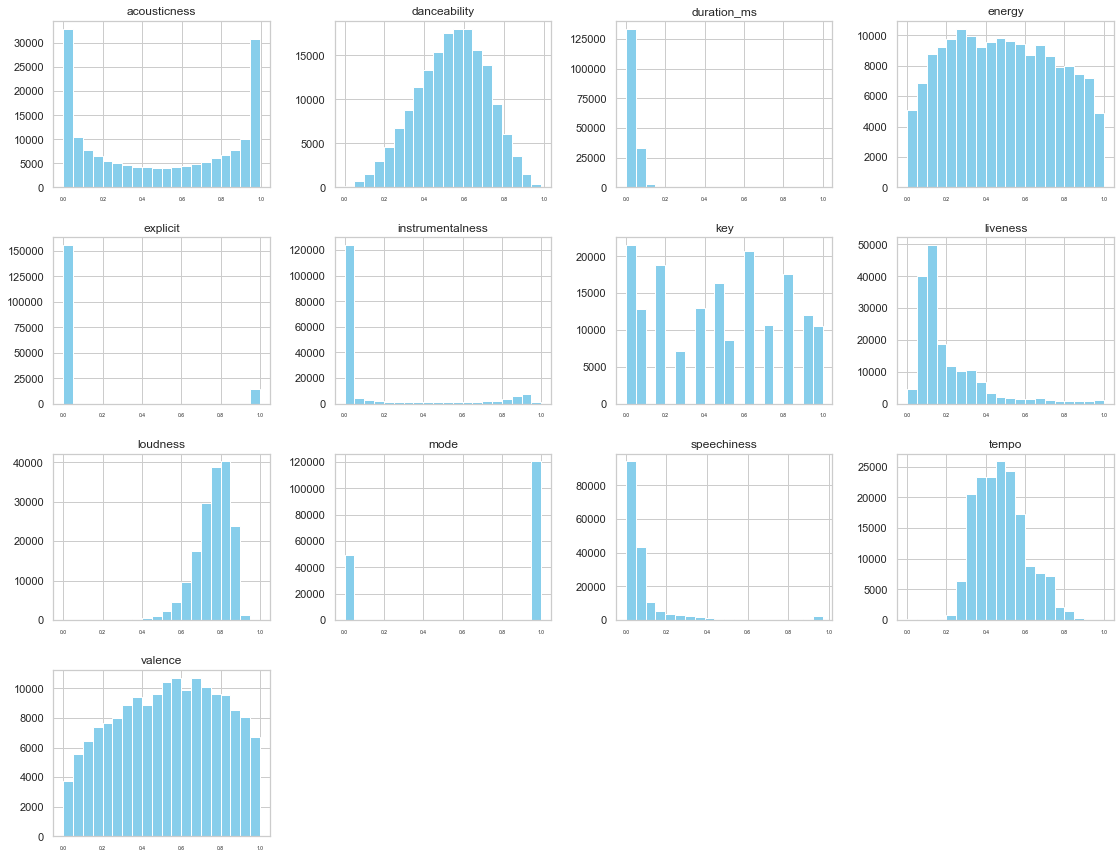

In [28]:
plt.rcParams["figure.figsize"] = [19,15]
plt.figure(figsize=(4,4))
features.hist(xlabelsize = 5, bins = 20, color = "skyblue")

Text(0.5, 0, 'Year')

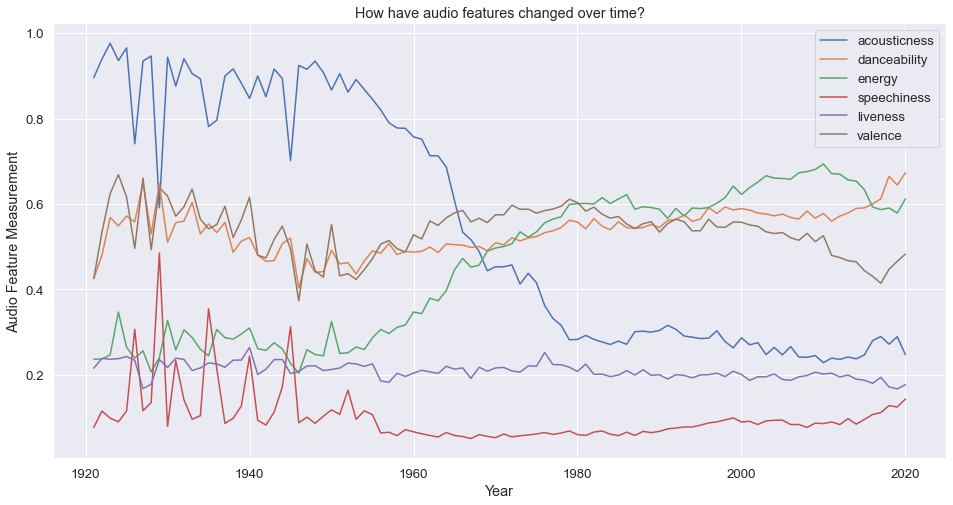

In [12]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid", font_scale = 1.2)
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = tracks.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('How have audio features changed over time?')
ax.set_ylabel('Audio Feature Measurement')
ax.set_xlabel('Year')

<AxesSubplot:>

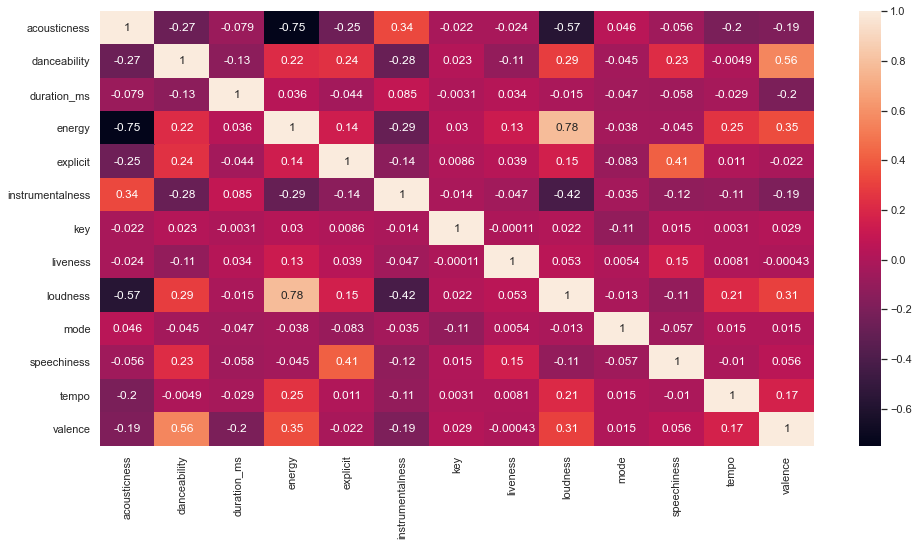

In [13]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = features.corr()
sns.heatmap(corr,annot=True)